In [1]:
# AeroCNN-I
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import datetime
%matplotlib inline

In [2]:
n_units=512
l2Regularizer=1e-09
kernel_size = 2
n_grid = 101
strides = 2
input_size = 49

In [76]:
alpha = np.linspace(-10,20,16).reshape((16,1))

In [82]:
aa = np.zeros((16*133,1))
for i in range(0, 133):
    aa[16*i:16*(i+1), :] = alpha[:,:]

In [83]:
aa.shape

(2128, 1)

In [84]:
aa = aa.reshape((133*16, 1, 1))

In [9]:
os.chdir('D:\\AirfoilClCdCoordinates_out\\AirfoilClCdCoordinates_out')

In [11]:
origin = "D:\\AirfoilClCdCoordinates_out\\AirfoilClCdCoordinates_out"
origin_data = "D:\\AirfoilClCdCoordinates_out\\AirfoilClCdCoordinates_out"
origin_coord = "D:\\AirfoilClCdCoordinates_out\\AirfoilClCdCoordinates_out"

In [15]:
folders_orig = os.listdir(origin_data)
folders = [file for file in folders_orig if file.startswith('airfoil')]

['airfoil1', 'airfoil10', 'airfoil100', 'airfoil101', 'airfoil102', 'airfoil103', 'airfoil104', 'airfoil105', 'airfoil106', 'airfoil107', 'airfoil108', 'airfoil109', 'airfoil11', 'airfoil110', 'airfoil111', 'airfoil112', 'airfoil113', 'airfoil114', 'airfoil115', 'airfoil116', 'airfoil117', 'airfoil118', 'airfoil119', 'airfoil12', 'airfoil120', 'airfoil121', 'airfoil122', 'airfoil123', 'airfoil124', 'airfoil125', 'airfoil126', 'airfoil127', 'airfoil128', 'airfoil129', 'airfoil13', 'airfoil130', 'airfoil131', 'airfoil132', 'airfoil133', 'airfoil14', 'airfoil15', 'airfoil16', 'airfoil17', 'airfoil18', 'airfoil19', 'airfoil2', 'airfoil20', 'airfoil21', 'airfoil22', 'airfoil23', 'airfoil24', 'airfoil25', 'airfoil26', 'airfoil27', 'airfoil28', 'airfoil29', 'airfoil3', 'airfoil30', 'airfoil31', 'airfoil32', 'airfoil33', 'airfoil34', 'airfoil35', 'airfoil36', 'airfoil37', 'airfoil38', 'airfoil39', 'airfoil4', 'airfoil40', 'airfoil41', 'airfoil42', 'airfoil43', 'airfoil44', 'airfoil45', 'airfoi

In [88]:
coord_df = pd.DataFrame()
counter = 1
for i in range(1, 134):
    coord_file_name = origin_coord + "\\airfoil" + str(i) + "\\airfoilOut"+ str(i) + ".txt"
    data = pd.read_csv(coord_file_name, sep = ",", header=None)
    while counter < 17:
        coord_df = pd.concat([coord_df, data], axis=0)
        counter += 1
    counter=1

In [89]:
coord_np = coord_df.iloc[:, :].values

In [90]:
coord = coord_np.reshape((len(folders)*16, 2, 50))

In [91]:
coord

array([[[ 0.00847943,  0.01368364,  0.01714728, ...,  0.00463386,
          0.00332462,  0.00197957],
        [-0.00847943, -0.01368364, -0.01714728, ..., -0.00463386,
         -0.00306321, -0.0012197 ]],

       [[ 0.00847943,  0.01368364,  0.01714728, ...,  0.00463386,
          0.00332462,  0.00197957],
        [-0.00847943, -0.01368364, -0.01714728, ..., -0.00463386,
         -0.00306321, -0.0012197 ]],

       [[ 0.00847943,  0.01368364,  0.01714728, ...,  0.00463386,
          0.00332462,  0.00197957],
        [-0.00847943, -0.01368364, -0.01714728, ..., -0.00463386,
         -0.00306321, -0.0012197 ]],

       ...,

       [[ 0.01857057,  0.04402334,  0.05837901, ...,  0.01447723,
          0.00965703,  0.00483662],
        [-0.01675291, -0.03940715, -0.05062344, ..., -0.0088099 ,
         -0.00587664, -0.00294325]],

       [[ 0.01857057,  0.04402334,  0.05837901, ...,  0.01447723,
          0.00965703,  0.00483662],
        [-0.01675291, -0.03940715, -0.05062344, ..., -0.00880

In [93]:
cl_df = pd.DataFrame()
for i in range(1, 134):
    for alpha_ in alpha:
        cl_name = origin_coord + "\\airfoil" + str(i) + "\\"+ str(int(alpha_)) + "\\Cl_" + str(i) + "_"+ str(int(alpha_)) +".txt"
        data = pd.read_csv(cl_name, sep = ",", header=None)
        cl_df = pd.concat([cl_df, data], axis=0)

In [94]:
cd_df = pd.DataFrame()
for i in range(1, 134):
    for alpha_ in alpha:
        cd_name = origin_coord + "\\airfoil" + str(i) + "\\"+ str(int(alpha_)) + "\\Cd_" + str(i) + "_"+ str(int(alpha_)) +".txt"
        data = pd.read_csv(cd_name, sep = ",", header=None)
        cd_df = pd.concat([cd_df, data], axis=0)

In [95]:
cl = cl_df.iloc[:, :].values.reshape((-1,1))
cd = cd_df.iloc[:, :].values.reshape((-1,1))
y = np.hstack((cl, cd))

In [96]:
y=y.reshape((133*16, 2,1))

In [97]:
file_name = origin_data + "\\AirfoilIndexList.xlsx"
airfoilName_df = pd.read_excel(file_name)
geometry_orig = airfoilName_df.iloc[:, 1].values

In [98]:
np.where(geometry_orig=='NACA0018')

(array([14], dtype=int64),)

In [99]:
geometry = np.zeros((133*16,1))
geometry = geometry.astype(np.string_)
for i in geometry_orig:
    index_ = np.where(geometry_orig==i)
    for j in range(0,16):
        geometry[16*index_[0]+j,:] = np.asarray(i)

In [100]:
geometry.shape

(2128, 1)

In [101]:
geometry = geometry.reshape((133*16, 1))

In [196]:
geometry[16*50:16*51]

array([[b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209'],
       [b'NACA63209']], dtype='|S32')

In [102]:
x_train, x_test, aa_train, aa_test, geo_train, geo_test, y_train, y_test = train_test_split(coord, aa, geometry, y, test_size=0.3, random_state=1)

In [103]:
input_coord = tf.keras.Input(shape=(2, 50))
input_alpha = tf.keras.Input(shape=(1,))
flatten = tf.keras.layers.Flatten()(input_coord)
reshape1 = tf.keras.layers.Reshape((1,))(input_alpha)
x_concat = tf.keras.layers.Concatenate(axis=1)([flatten, reshape1])

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_concat)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
output_data = tf.keras.layers.Dense(units=2, activation=None, name='outputLayerSensor')(x_)
output_coeff = tf.keras.layers.Reshape((2, 1))(output_data)
# MLP
model = tf.keras.Model([input_coord, input_alpha], output_coeff)

In [104]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 50)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 flatten (Flatten)              (None, 100)          0           ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 1)            0           ['input_2[0][0]']                
                                                                                              

In [105]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [106]:
start = datetime.datetime.now()
history = model.fit([x_train,aa_train], y_train, epochs=5000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/5000
47/47 [==============================] - 2s 10ms/step - loss: 0.0484 - rmse: 0.2200
Epoch 2/5000
47/47 [==============================] - 0s 8ms/step - loss: 0.0142 - rmse: 0.1193
Epoch 3/5000
47/47 [==============================] - 0s 8ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 4/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 5/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 6/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0100 - rmse: 0.1002
Epoch 7/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 8/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 9/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 10/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 11/5000
47/47 [=================

47/47 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 86/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 87/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 88/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 89/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 90/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 91/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 92/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 93/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 94/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 95/5000
47/47 [=======================

47/47 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 169/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 170/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 171/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 172/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 173/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 174/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 175/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 176/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 177/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 178/5000
47/47 [=============

47/47 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 252/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 253/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0561
Epoch 254/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 255/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 256/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 257/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 258/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 259/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 260/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 261/5000
47/47 [=============

47/47 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 335/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 336/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 337/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 338/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 339/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 340/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 341/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 342/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 343/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 344/5000
47/47 [=============

47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 418/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 419/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 420/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 421/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 422/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 423/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 424/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 425/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 426/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 427/5000
47/47 [=============

47/47 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 501/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 502/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 503/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 504/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 505/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 506/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 507/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 508/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 509/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 510/5000
47/47 [=============

47/47 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 583/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 584/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 585/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.8114e-04 - rmse: 0.0313
Epoch 586/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.0175e-04 - rmse: 0.0282
Epoch 587/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.8558e-04 - rmse: 0.0279
Epoch 588/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.3091e-04 - rmse: 0.0250
Epoch 589/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.3174e-04 - rmse: 0.0250
Epoch 590/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.9068e-04 - rmse: 0.0262
Epoch 591/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 592/5

47/47 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 665/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 666/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.2115e-04 - rmse: 0.0286
Epoch 667/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.0333e-04 - rmse: 0.0245
Epoch 668/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.6858e-04 - rmse: 0.0215
Epoch 669/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.5177e-04 - rmse: 0.0234
Epoch 670/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.3671e-04 - rmse: 0.0251
Epoch 671/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.2914e-04 - rmse: 0.0229
Epoch 672/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.3002e-04 - rmse: 0.0250
Epoch 673/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 6

Epoch 746/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.4222e-04 - rmse: 0.0209
Epoch 747/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9945e-04 - rmse: 0.0199
Epoch 748/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.3346e-04 - rmse: 0.0207
Epoch 749/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 750/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.0165e-04 - rmse: 0.0282
Epoch 751/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.6398e-04 - rmse: 0.0237
Epoch 752/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.4743e-04 - rmse: 0.0290
Epoch 753/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.4332e-04 - rmse: 0.0232
Epoch 754/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 755/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse:

47/47 [==============================] - 0s 7ms/step - loss: 5.0541e-04 - rmse: 0.0224
Epoch 828/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.4619e-04 - rmse: 0.0185
Epoch 829/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6260e-04 - rmse: 0.0189
Epoch 830/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0176e-04 - rmse: 0.0199
Epoch 831/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.2868e-04 - rmse: 0.0180
Epoch 832/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9596e-04 - rmse: 0.0171
Epoch 833/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7772e-04 - rmse: 0.0165
Epoch 834/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9767e-04 - rmse: 0.0198
Epoch 835/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.5879e-04 - rmse: 0.0235
Epoch 836/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0444e-04 - rmse: 0.

47/47 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 909/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 910/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.3858e-04 - rmse: 0.0306
Epoch 911/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.6686e-04 - rmse: 0.0276
Epoch 912/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.8817e-04 - rmse: 0.0280
Epoch 913/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.0249e-04 - rmse: 0.0223
Epoch 914/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.5615e-04 - rmse: 0.0187
Epoch 915/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6480e-04 - rmse: 0.0190
Epoch 916/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.7304e-04 - rmse: 0.0216
Epoch 917/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.5353e-04 - rmse: 0.0212
Epo

47/47 [==============================] - 0s 7ms/step - loss: 6.6889e-04 - rmse: 0.0258
Epoch 990/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.1635e-04 - rmse: 0.0203
Epoch 991/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.1207e-04 - rmse: 0.0202
Epoch 992/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9025e-04 - rmse: 0.0169
Epoch 993/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8904e-04 - rmse: 0.0169
Epoch 994/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1203e-04 - rmse: 0.0175
Epoch 995/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0387e-04 - rmse: 0.0200
Epoch 996/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9809e-04 - rmse: 0.0171
Epoch 997/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1726e-04 - rmse: 0.0177
Epoch 998/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9863e-04 - rmse: 0.

47/47 [==============================] - 0s 7ms/step - loss: 3.2625e-04 - rmse: 0.0179
Epoch 1070/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3948e-04 - rmse: 0.0153
Epoch 1071/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7630e-04 - rmse: 0.0165
Epoch 1072/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7061e-04 - rmse: 0.0163
Epoch 1073/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0542e-04 - rmse: 0.0173
Epoch 1074/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 1075/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 1076/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 1077/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1078/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 

47/47 [==============================] - 0s 7ms/step - loss: 4.8759e-04 - rmse: 0.0220
Epoch 1150/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.3772e-04 - rmse: 0.0208
Epoch 1151/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.1833e-04 - rmse: 0.0203
Epoch 1152/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.8132e-04 - rmse: 0.0194
Epoch 1153/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.5135e-04 - rmse: 0.0234
Epoch 1154/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.6650e-04 - rmse: 0.0237
Epoch 1155/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.3743e-04 - rmse: 0.0252
Epoch 1156/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1157/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 1158/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.047

47/47 [==============================] - 0s 7ms/step - loss: 3.2109e-04 - rmse: 0.0178
Epoch 1230/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0137e-04 - rmse: 0.0172
Epoch 1231/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4376e-04 - rmse: 0.0155
Epoch 1232/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.5107e-04 - rmse: 0.0186
Epoch 1233/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4457e-04 - rmse: 0.0155
Epoch 1234/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5096e-04 - rmse: 0.0157
Epoch 1235/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6112e-04 - rmse: 0.0160
Epoch 1236/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5437e-04 - rmse: 0.0158
Epoch 1237/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.4201e-04 - rmse: 0.0184
Epoch 1238/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8040e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.6186e-04 - rmse: 0.0160
Epoch 1310/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7284e-04 - rmse: 0.0164
Epoch 1311/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.2384e-04 - rmse: 0.0228
Epoch 1312/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1178e-04 - rmse: 0.0175
Epoch 1313/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0277e-04 - rmse: 0.0141
Epoch 1314/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.6035e-04 - rmse: 0.0275
Epoch 1315/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 1316/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.2662e-04 - rmse: 0.0304
Epoch 1317/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 1318/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.060

47/47 [==============================] - 0s 7ms/step - loss: 5.8800e-04 - rmse: 0.0241
Epoch 1390/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 1391/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.6126e-04 - rmse: 0.0236
Epoch 1392/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.5708e-04 - rmse: 0.0213
Epoch 1393/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.3060e-04 - rmse: 0.0269
Epoch 1394/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1395/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.9065e-04 - rmse: 0.0298
Epoch 1396/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.1182e-04 - rmse: 0.0246
Epoch 1397/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.7669e-04 - rmse: 0.0312
Epoch 1398/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6393e-04 - rmse: 0

47/47 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 1470/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 1471/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.1604e-04 - rmse: 0.0267
Epoch 1472/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.5460e-04 - rmse: 0.0212
Epoch 1473/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.6794e-04 - rmse: 0.0215
Epoch 1474/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0230e-04 - rmse: 0.0172
Epoch 1475/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8395e-04 - rmse: 0.0167
Epoch 1476/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2799e-04 - rmse: 0.0149
Epoch 1477/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9123e-04 - rmse: 0.0197
Epoch 1478/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.7107e-04 - rmse: 0

47/47 [==============================] - 0s 7ms/step - loss: 4.8441e-04 - rmse: 0.0219
Epoch 1550/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 1551/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.9245e-04 - rmse: 0.0298
Epoch 1552/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.2551e-04 - rmse: 0.0228
Epoch 1553/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1191e-04 - rmse: 0.0175
Epoch 1554/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1555/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 1556/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.4441e-04 - rmse: 0.0232
Epoch 1557/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6333e-04 - rmse: 0.0189
Epoch 1558/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.1620e-04 - rmse: 0.022

47/47 [==============================] - 0s 7ms/step - loss: 7.0827e-04 - rmse: 0.0265
Epoch 1629/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 1630/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0474
Epoch 1631/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 1632/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 1633/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 1634/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.8189e-04 - rmse: 0.0296
Epoch 1635/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.9542e-04 - rmse: 0.0221
Epoch 1636/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.5050e-04 - rmse: 0.0211
Epoch 1637/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0157e-04 - rmse: 0.0199
Epoch 

47/47 [==============================] - 0s 7ms/step - loss: 3.8115e-04 - rmse: 0.0194
Epoch 1709/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 1710/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 1711/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.5482e-04 - rmse: 0.0308
Epoch 1712/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 1713/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.7325e-04 - rmse: 0.0238
Epoch 1714/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9548e-04 - rmse: 0.0170
Epoch 1715/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9974e-04 - rmse: 0.0199
Epoch 1716/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.1908e-04 - rmse: 0.0248
Epoch 1717/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3287e-04 - rmse: 0.018

47/47 [==============================] - 0s 7ms/step - loss: 1.8533e-04 - rmse: 0.0134
Epoch 1789/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0054e-04 - rmse: 0.0140
Epoch 1790/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7453e-04 - rmse: 0.0130
Epoch 1791/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9478e-04 - rmse: 0.0170
Epoch 1792/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3391e-04 - rmse: 0.0181
Epoch 1793/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.2772e-04 - rmse: 0.0249
Epoch 1794/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.9289e-04 - rmse: 0.0314
Epoch 1795/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 1796/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 1797/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.051

47/47 [==============================] - 0s 7ms/step - loss: 5.4459e-04 - rmse: 0.0232
Epoch 1869/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.2816e-04 - rmse: 0.0229
Epoch 1870/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8778e-04 - rmse: 0.0168
Epoch 1871/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6251e-04 - rmse: 0.0160
Epoch 1872/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9703e-04 - rmse: 0.0138
Epoch 1873/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0991e-04 - rmse: 0.0143
Epoch 1874/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9596e-04 - rmse: 0.0170
Epoch 1875/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3254e-04 - rmse: 0.0181
Epoch 1876/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6614e-04 - rmse: 0.0161
Epoch 1877/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1216e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 6.4011e-04 - rmse: 0.0252
Epoch 1949/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.6195e-04 - rmse: 0.0256
Epoch 1950/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.4680e-04 - rmse: 0.0210
Epoch 1951/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.5102e-04 - rmse: 0.0234
Epoch 1952/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6324e-04 - rmse: 0.0189
Epoch 1953/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8522e-04 - rmse: 0.0167
Epoch 1954/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.2279e-04 - rmse: 0.0204
Epoch 1955/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.7540e-04 - rmse: 0.0192
Epoch 1956/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.2849e-04 - rmse: 0.0206
Epoch 1957/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.8500e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.6899e-04 - rmse: 0.0128
Epoch 2029/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8227e-04 - rmse: 0.0133
Epoch 2030/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3164e-04 - rmse: 0.0150
Epoch 2031/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5668e-04 - rmse: 0.0158
Epoch 2032/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1158e-04 - rmse: 0.0175
Epoch 2033/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 2034/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.7036e-04 - rmse: 0.0294
Epoch 2035/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.4402e-04 - rmse: 0.0184
Epoch 2036/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.5867e-04 - rmse: 0.0213
Epoch 2037/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.7534e-04 - rms

47/47 [==============================] - 0s 7ms/step - loss: 2.3058e-04 - rmse: 0.0150
Epoch 2109/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1338e-04 - rmse: 0.0144
Epoch 2110/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.7571e-04 - rmse: 0.0259
Epoch 2111/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 2112/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.5608e-04 - rmse: 0.0274
Epoch 2113/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 2114/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.3767e-04 - rmse: 0.0231
Epoch 2115/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.8857e-04 - rmse: 0.0220
Epoch 2116/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 2117/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.6536e-04 - rmse: 0.029

47/47 [==============================] - 0s 7ms/step - loss: 3.4424e-04 - rmse: 0.0184
Epoch 2188/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0386e-04 - rmse: 0.0200
Epoch 2189/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.8079e-04 - rmse: 0.0296
Epoch 2190/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0323
Epoch 2191/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2192/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 2193/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 2194/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 2195/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 2196/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 2197/500

47/47 [==============================] - 0s 7ms/step - loss: 2.5260e-04 - rmse: 0.0157
Epoch 2268/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7457e-04 - rmse: 0.0130
Epoch 2269/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0458e-04 - rmse: 0.0141
Epoch 2270/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8187e-04 - rmse: 0.0166
Epoch 2271/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.6058e-04 - rmse: 0.0213
Epoch 2272/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2273/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.2926e-04 - rmse: 0.0250
Epoch 2274/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.7816e-04 - rmse: 0.0193
Epoch 2275/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3426e-04 - rmse: 0.0151
Epoch 2276/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2680e-04 - rms

47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 2348/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.8303e-04 - rmse: 0.0240
Epoch 2349/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3551e-04 - rmse: 0.0182
Epoch 2350/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6311e-04 - rmse: 0.0160
Epoch 2351/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3511e-04 - rmse: 0.0181
Epoch 2352/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.8389e-04 - rmse: 0.0194
Epoch 2353/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3209e-04 - rmse: 0.0150
Epoch 2354/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.7102e-04 - rmse: 0.0216
Epoch 2355/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.8811e-04 - rmse: 0.0196
Epoch 2356/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9191e-04 - rms

47/47 [==============================] - 0s 7ms/step - loss: 1.4037e-04 - rmse: 0.0116
Epoch 2428/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6482e-04 - rmse: 0.0161
Epoch 2429/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7976e-04 - rmse: 0.0132
Epoch 2430/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5872e-04 - rmse: 0.0124
Epoch 2431/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6914e-04 - rmse: 0.0128
Epoch 2432/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0849e-04 - rmse: 0.0142
Epoch 2433/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.4066e-04 - rmse: 0.0209
Epoch 2434/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 2435/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 2436/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.6264e-04 - rmse: 0

Epoch 2507/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3011e-04 - rmse: 0.0180
Epoch 2508/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3033e-04 - rmse: 0.0180
Epoch 2509/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.9117e-04 - rmse: 0.0280
Epoch 2510/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.9810e-04 - rmse: 0.0299
Epoch 2511/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.4528e-04 - rmse: 0.0272
Epoch 2512/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.2397e-04 - rmse: 0.0178
Epoch 2513/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.5101e-04 - rmse: 0.0186
Epoch 2514/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 2515/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.4144e-04 - rmse: 0.0271
Epoch 2516/5000
47/47 [==============================] - 0s 7ms/step - loss: 

47/47 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 2587/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 2588/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.1631e-04 - rmse: 0.0203
Epoch 2589/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0905e-04 - rmse: 0.0174
Epoch 2590/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0289e-04 - rmse: 0.0140
Epoch 2591/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6617e-04 - rmse: 0.0127
Epoch 2592/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5842e-04 - rmse: 0.0123
Epoch 2593/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4103e-04 - rmse: 0.0116
Epoch 2594/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0394e-04 - rmse: 0.0141
Epoch 2595/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1416e-04 - rmse: 0

47/47 [==============================] - 0s 7ms/step - loss: 1.4608e-04 - rmse: 0.0118
Epoch 2666/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.6800e-04 - rmse: 0.0257
Epoch 2667/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.8220e-04 - rmse: 0.0194
Epoch 2668/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.2323e-04 - rmse: 0.0178
Epoch 2669/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5439e-04 - rmse: 0.0122
Epoch 2670/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.3372e-04 - rmse: 0.0230
Epoch 2671/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6452e-04 - rmse: 0.0161
Epoch 2672/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7580e-04 - rmse: 0.0130
Epoch 2673/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5821e-04 - rmse: 0.0123
Epoch 2674/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4693e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.5851e-04 - rmse: 0.0123
Epoch 2745/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8904e-04 - rmse: 0.0135
Epoch 2746/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.2102e-04 - rmse: 0.0227
Epoch 2747/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3275e-04 - rmse: 0.0151
Epoch 2748/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6843e-04 - rmse: 0.0162
Epoch 2749/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9027e-04 - rmse: 0.0136
Epoch 2750/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8250e-04 - rmse: 0.0133
Epoch 2751/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.1727e-04 - rmse: 0.0267
Epoch 2752/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.5630e-04 - rmse: 0.0212
Epoch 2753/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.2805e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 3.8467e-04 - rmse: 0.0195
Epoch 2824/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.2264e-04 - rmse: 0.0178
Epoch 2825/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1099e-04 - rmse: 0.0143
Epoch 2826/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2779e-04 - rmse: 0.0149
Epoch 2827/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5814e-04 - rmse: 0.0123
Epoch 2828/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9399e-04 - rmse: 0.0170
Epoch 2829/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0129e-04 - rmse: 0.0140
Epoch 2830/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3414e-04 - rmse: 0.0113
Epoch 2831/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2564e-04 - rmse: 0.0148
Epoch 2832/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3774e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.4676e-04 - rmse: 0.0119
Epoch 2903/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.2864e-04 - rmse: 0.0206
Epoch 2904/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4600e-04 - rmse: 0.0155
Epoch 2905/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0739e-04 - rmse: 0.0200
Epoch 2906/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8479e-04 - rmse: 0.0134
Epoch 2907/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4089e-04 - rmse: 0.0116
Epoch 2908/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9515e-04 - rmse: 0.0137
Epoch 2909/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6881e-04 - rmse: 0.0128
Epoch 2910/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5438e-04 - rmse: 0.0122
Epoch 2911/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4835e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.2097e-04 - rmse: 0.0147
Epoch 2982/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5215e-04 - rmse: 0.0121
Epoch 2983/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0648e-04 - rmse: 0.0141
Epoch 2984/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3314e-04 - rmse: 0.0113
Epoch 2985/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.8714e-04 - rmse: 0.0241
Epoch 2986/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0631e-04 - rmse: 0.0141
Epoch 2987/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7157e-04 - rmse: 0.0129
Epoch 2988/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3676e-04 - rmse: 0.0114
Epoch 2989/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6647e-04 - rmse: 0.0127
Epoch 2990/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4733e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.3494e-04 - rmse: 0.0113
Epoch 3061/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.7803e-04 - rmse: 0.0193
Epoch 3062/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0638e-04 - rmse: 0.0141
Epoch 3063/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6618e-04 - rmse: 0.0126
Epoch 3064/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6870e-04 - rmse: 0.0127
Epoch 3065/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4235e-04 - rmse: 0.0117
Epoch 3066/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7501e-04 - rmse: 0.0130
Epoch 3067/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4285e-04 - rmse: 0.0117
Epoch 3068/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5956e-04 - rmse: 0.0124
Epoch 3069/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9023e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.3693e-04 - rmse: 0.0114
Epoch 3140/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7972e-04 - rmse: 0.0132
Epoch 3141/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5107e-04 - rmse: 0.0120
Epoch 3142/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5862e-04 - rmse: 0.0159
Epoch 3143/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.3197e-04 - rmse: 0.0206
Epoch 3144/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2079e-04 - rmse: 0.0146
Epoch 3145/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0674e-04 - rmse: 0.0173
Epoch 3146/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6937e-04 - rmse: 0.0162
Epoch 3147/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0497e-04 - rmse: 0.0141
Epoch 3148/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9995e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 3.4509e-04 - rmse: 0.0184
Epoch 3219/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7239e-04 - rmse: 0.0163
Epoch 3220/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0173e-04 - rmse: 0.0140
Epoch 3221/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5272e-04 - rmse: 0.0157
Epoch 3222/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.3479e-04 - rmse: 0.0230
Epoch 3223/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3902e-04 - rmse: 0.0153
Epoch 3224/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5330e-04 - rmse: 0.0157
Epoch 3225/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2672e-04 - rmse: 0.0110
Epoch 3226/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.0583e-05 - rmse: 0.0092
Epoch 3227/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4425e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.3386e-04 - rmse: 0.0151
Epoch 3298/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0818e-04 - rmse: 0.0142
Epoch 3299/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1478e-04 - rmse: 0.0176
Epoch 3300/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.2602e-04 - rmse: 0.0179
Epoch 3301/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5740e-04 - rmse: 0.0158
Epoch 3302/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7216e-04 - rmse: 0.0129
Epoch 3303/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0065e-04 - rmse: 0.0172
Epoch 3304/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7776e-04 - rmse: 0.0165
Epoch 3305/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8951e-04 - rmse: 0.0135
Epoch 3306/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9978e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.4151e-04 - rmse: 0.0153
Epoch 3377/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1003e-04 - rmse: 0.0143
Epoch 3378/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.7785e-04 - rmse: 0.0193
Epoch 3379/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3480e-04 - rmse: 0.0151
Epoch 3380/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0342e-04 - rmse: 0.0140
Epoch 3381/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.2039e-04 - rmse: 0.0203
Epoch 3382/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.0116e-04 - rmse: 0.0199
Epoch 3383/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.1943e-04 - rmse: 0.0203
Epoch 3384/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3813e-04 - rmse: 0.0152
Epoch 3385/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6703e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 3.9856e-04 - rmse: 0.0198
Epoch 3456/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6462e-04 - rmse: 0.0189
Epoch 3457/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4258e-04 - rmse: 0.0154
Epoch 3458/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5139e-04 - rmse: 0.0156
Epoch 3459/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0178e-04 - rmse: 0.0140
Epoch 3460/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5654e-04 - rmse: 0.0122
Epoch 3461/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6745e-04 - rmse: 0.0127
Epoch 3462/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9566e-04 - rmse: 0.0138
Epoch 3463/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3211e-04 - rmse: 0.0112
Epoch 3464/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.0081e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.9094e-04 - rmse: 0.0136
Epoch 3535/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2341e-04 - rmse: 0.0147
Epoch 3536/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5481e-04 - rmse: 0.0122
Epoch 3537/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4628e-04 - rmse: 0.0155
Epoch 3538/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7997e-04 - rmse: 0.0132
Epoch 3539/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0053e-04 - rmse: 0.0139
Epoch 3540/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5565e-04 - rmse: 0.0122
Epoch 3541/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3347e-04 - rmse: 0.0113
Epoch 3542/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8793e-04 - rmse: 0.0168
Epoch 3543/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6266e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.8386e-04 - rmse: 0.0133
Epoch 3614/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6802e-04 - rmse: 0.0127
Epoch 3615/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4185e-04 - rmse: 0.0116
Epoch 3616/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0849e-04 - rmse: 0.0174
Epoch 3617/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8432e-04 - rmse: 0.0133
Epoch 3618/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2296e-04 - rmse: 0.0147
Epoch 3619/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5138e-04 - rmse: 0.0156
Epoch 3620/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8408e-04 - rmse: 0.0133
Epoch 3621/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0896e-04 - rmse: 0.0142
Epoch 3622/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3254e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.3834e-04 - rmse: 0.0115
Epoch 3693/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9084e-04 - rmse: 0.0136
Epoch 3694/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8415e-04 - rmse: 0.0133
Epoch 3695/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1822e-04 - rmse: 0.0106
Epoch 3696/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.4270e-05 - rmse: 0.0088
Epoch 3697/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2617e-04 - rmse: 0.0148
Epoch 3698/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2995e-04 - rmse: 0.0111
Epoch 3699/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0520e-04 - rmse: 0.0141
Epoch 3700/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1172e-04 - rmse: 0.0102
Epoch 3701/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0743e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 9.3967e-05 - rmse: 0.0093
Epoch 3772/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1415e-04 - rmse: 0.0104
Epoch 3773/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0155e-04 - rmse: 0.0140
Epoch 3774/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9510e-04 - rmse: 0.0137
Epoch 3775/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5920e-04 - rmse: 0.0123
Epoch 3776/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2905e-04 - rmse: 0.0111
Epoch 3777/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8219e-04 - rmse: 0.0166
Epoch 3778/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8610e-04 - rmse: 0.0134
Epoch 3779/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8569e-04 - rmse: 0.0134
Epoch 3780/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3819e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 5.7754e-04 - rmse: 0.0239
Epoch 3851/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7774e-04 - rmse: 0.0165
Epoch 3852/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6663e-04 - rmse: 0.0190
Epoch 3853/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.2759e-04 - rmse: 0.0303
Epoch 3854/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.8803e-04 - rmse: 0.0241
Epoch 3855/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8575e-04 - rmse: 0.0167
Epoch 3856/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9047e-04 - rmse: 0.0196
Epoch 3857/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0755e-04 - rmse: 0.0142
Epoch 3858/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1951e-04 - rmse: 0.0146
Epoch 3859/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.3394e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.8897e-04 - rmse: 0.0135
Epoch 3930/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7937e-04 - rmse: 0.0131
Epoch 3931/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2284e-04 - rmse: 0.0147
Epoch 3932/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8048e-04 - rmse: 0.0132
Epoch 3933/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2613e-04 - rmse: 0.0148
Epoch 3934/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8119e-04 - rmse: 0.0166
Epoch 3935/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4942e-04 - rmse: 0.0119
Epoch 3936/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1380e-04 - rmse: 0.0103
Epoch 3937/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6285e-04 - rmse: 0.0125
Epoch 3938/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.8753e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 8.6720e-04 - rmse: 0.0293
Epoch 4009/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 4010/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.4304e-04 - rmse: 0.0209
Epoch 4011/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5605e-04 - rmse: 0.0158
Epoch 4012/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0993e-04 - rmse: 0.0142
Epoch 4013/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1752e-04 - rmse: 0.0105
Epoch 4014/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1186e-04 - rmse: 0.0102
Epoch 4015/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6536e-04 - rmse: 0.0126
Epoch 4016/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5034e-04 - rmse: 0.0120
Epoch 4017/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4507e-04 - rms

47/47 [==============================] - 0s 7ms/step - loss: 6.1781e-04 - rmse: 0.0247
Epoch 4088/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.7629e-04 - rmse: 0.0217
Epoch 4089/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6320e-04 - rmse: 0.0160
Epoch 4090/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9890e-04 - rmse: 0.0139
Epoch 4091/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7502e-04 - rmse: 0.0164
Epoch 4092/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8775e-04 - rmse: 0.0134
Epoch 4093/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.5620e-04 - rmse: 0.0274
Epoch 4094/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.8792e-04 - rmse: 0.0279
Epoch 4095/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.2301e-04 - rmse: 0.0248
Epoch 4096/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.2487e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.2207e-04 - rmse: 0.0107
Epoch 4167/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2255e-04 - rmse: 0.0107
Epoch 4168/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2767e-04 - rmse: 0.0110
Epoch 4169/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.4274e-04 - rmse: 0.0183
Epoch 4170/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1395e-04 - rmse: 0.0144
Epoch 4171/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6656e-04 - rmse: 0.0126
Epoch 4172/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.0592e-04 - rmse: 0.0099
Epoch 4173/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7084e-04 - rmse: 0.0162
Epoch 4174/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4291e-04 - rmse: 0.0117
Epoch 4175/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4571e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.5721e-04 - rmse: 0.0123
Epoch 4246/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5125e-04 - rmse: 0.0120
Epoch 4247/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2110e-04 - rmse: 0.0107
Epoch 4248/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3674e-04 - rmse: 0.0152
Epoch 4249/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8557e-04 - rmse: 0.0167
Epoch 4250/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.7284e-04 - rmse: 0.0238
Epoch 4251/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 4252/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.9479e-04 - rmse: 0.0221
Epoch 4253/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2187e-04 - rmse: 0.0147
Epoch 4254/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6217e-04 - rms

47/47 [==============================] - 0s 7ms/step - loss: 1.0266e-04 - rmse: 0.0098
Epoch 4325/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2650e-04 - rmse: 0.0109
Epoch 4326/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.3089e-04 - rmse: 0.0229
Epoch 4327/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4616e-04 - rmse: 0.0155
Epoch 4328/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5446e-04 - rmse: 0.0121
Epoch 4329/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.3887e-04 - rmse: 0.0115
Epoch 4330/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9129e-04 - rmse: 0.0169
Epoch 4331/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.8317e-04 - rmse: 0.0194
Epoch 4332/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6881e-04 - rmse: 0.0127
Epoch 4333/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7229e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.5829e-04 - rmse: 0.0158
Epoch 4404/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7384e-04 - rmse: 0.0163
Epoch 4405/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3280e-04 - rmse: 0.0150
Epoch 4406/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7905e-04 - rmse: 0.0131
Epoch 4407/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.1010e-04 - rmse: 0.0101
Epoch 4408/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2553e-04 - rmse: 0.0109
Epoch 4409/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8282e-04 - rmse: 0.0133
Epoch 4410/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2999e-04 - rmse: 0.0111
Epoch 4411/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1372e-04 - rmse: 0.0144
Epoch 4412/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6582e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.0774e-04 - rmse: 0.0142
Epoch 4483/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.2396e-04 - rmse: 0.0108
Epoch 4484/5000
47/47 [==============================] - 0s 7ms/step - loss: 9.8427e-05 - rmse: 0.0096
Epoch 4485/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.4521e-04 - rmse: 0.0184
Epoch 4486/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4487/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 4488/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.3134e-04 - rmse: 0.0229
Epoch 4489/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5552e-04 - rmse: 0.0158
Epoch 4490/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6929e-04 - rmse: 0.0127
Epoch 4491/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6910e-04 - rmse: 0

47/47 [==============================] - 0s 7ms/step - loss: 3.7011e-04 - rmse: 0.0190
Epoch 4562/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.5686e-04 - rmse: 0.0187
Epoch 4563/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1090e-04 - rmse: 0.0143
Epoch 4564/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.8493e-04 - rmse: 0.0133
Epoch 4565/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.9786e-04 - rmse: 0.0170
Epoch 4566/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.4930e-04 - rmse: 0.0233
Epoch 4567/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.2427e-04 - rmse: 0.0268
Epoch 4568/5000
47/47 [==============================] - 0s 7ms/step - loss: 6.6456e-04 - rmse: 0.0256
Epoch 4569/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.9220e-04 - rmse: 0.0196
Epoch 4570/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.2312e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.7862e-04 - rmse: 0.0165
Epoch 4642/5000
47/47 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 4643/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.3103e-04 - rmse: 0.0269
Epoch 4644/5000
47/47 [==============================] - 0s 7ms/step - loss: 7.2110e-04 - rmse: 0.0267
Epoch 4645/5000
47/47 [==============================] - 0s 7ms/step - loss: 5.7607e-04 - rmse: 0.0238
Epoch 4646/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.5836e-04 - rmse: 0.0187
Epoch 4647/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.8425e-04 - rmse: 0.0166
Epoch 4648/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.7439e-04 - rmse: 0.0192
Epoch 4649/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4182e-04 - rmse: 0.0153
Epoch 4650/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3546e-04 - rms

47/47 [==============================] - 0s 7ms/step - loss: 2.3210e-04 - rmse: 0.0150
Epoch 4721/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1402e-04 - rmse: 0.0175
Epoch 4722/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1455e-04 - rmse: 0.0175
Epoch 4723/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3372e-04 - rmse: 0.0150
Epoch 4724/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.7612e-04 - rmse: 0.0164
Epoch 4725/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4534e-04 - rmse: 0.0154
Epoch 4726/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3874e-04 - rmse: 0.0152
Epoch 4727/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0631e-04 - rmse: 0.0141
Epoch 4728/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.3431e-04 - rmse: 0.0151
Epoch 4729/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9422e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.6590e-04 - rmse: 0.0161
Epoch 4800/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.6486e-04 - rmse: 0.0160
Epoch 4801/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0590e-04 - rmse: 0.0141
Epoch 4802/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.7580e-04 - rmse: 0.0130
Epoch 4803/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5357e-04 - rmse: 0.0121
Epoch 4804/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6846e-04 - rmse: 0.0127
Epoch 4805/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.9898e-04 - rmse: 0.0138
Epoch 4806/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0123e-04 - rmse: 0.0139
Epoch 4807/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6365e-04 - rmse: 0.0189
Epoch 4808/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0507e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 2.3521e-04 - rmse: 0.0151
Epoch 4879/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.7083e-04 - rmse: 0.0191
Epoch 4880/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.0888e-04 - rmse: 0.0174
Epoch 4881/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1911e-04 - rmse: 0.0146
Epoch 4882/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.5655e-04 - rmse: 0.0158
Epoch 4883/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6374e-04 - rmse: 0.0125
Epoch 4884/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.6764e-04 - rmse: 0.0127
Epoch 4885/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.1855e-04 - rmse: 0.0145
Epoch 4886/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.5555e-04 - rmse: 0.0122
Epoch 4887/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.1011e-04 -

47/47 [==============================] - 0s 7ms/step - loss: 1.5601e-04 - rmse: 0.0122
Epoch 4958/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.4595e-04 - rmse: 0.0154
Epoch 4959/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4881e-04 - rmse: 0.0119
Epoch 4960/5000
47/47 [==============================] - 0s 7ms/step - loss: 4.3894e-04 - rmse: 0.0208
Epoch 4961/5000
47/47 [==============================] - 0s 7ms/step - loss: 8.7776e-04 - rmse: 0.0295
Epoch 4962/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.3234e-04 - rmse: 0.0180
Epoch 4963/5000
47/47 [==============================] - 0s 7ms/step - loss: 3.6612e-04 - rmse: 0.0189
Epoch 4964/5000
47/47 [==============================] - 0s 7ms/step - loss: 2.0160e-04 - rmse: 0.0139
Epoch 4965/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4109e-04 - rmse: 0.0116
Epoch 4966/5000
47/47 [==============================] - 0s 7ms/step - loss: 1.4403e-04 -

In [107]:
time = end - start
print("Training time:", time)

Training time: 0:27:40.182246


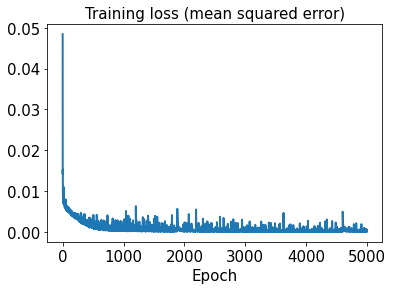

In [108]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

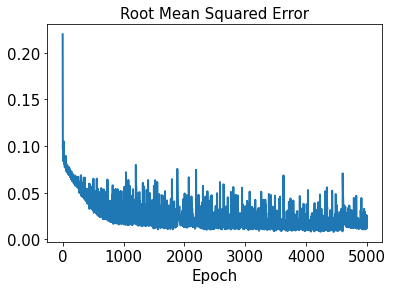

In [109]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [110]:
test_results = model.evaluate([x_train,aa_train])

47/47 [==============================] - 0s 2ms/step - loss: 7.3814e-06 - rmse: 0.0000e+00


In [111]:
decoded_train = model.predict([x_train,aa_train])

47/47 [==============================] - 0s 2ms/step


In [112]:
decoded_test = model.predict([x_test, aa_test])

20/20 [==============================] - 0s 2ms/step


In [113]:
error_train_abs = np.abs(decoded_train - y_train)

In [114]:
error_test_abs = np.abs(decoded_test - y_test)

In [124]:
error_train_Cl_abs = np.abs(decoded_train[:,0,:] - y_train[:,0,:])

In [125]:
error_train_Cd_abs = np.abs(decoded_train[:,1,:] - y_train[:,1,:])

In [126]:
error_test_Cl_abs = np.abs(decoded_test[:,0,:] - y_test[:,0,:])

In [127]:
error_test_Cd_abs = np.abs(decoded_test[:,1,:] - y_test[:,1,:])

In [123]:
decoded_train.shape

(1489, 2, 1)

In [115]:
l2_error_train = np.sqrt(np.sum((decoded_train - y_train)**2) / np.sum(y_train**2))
print(l2_error_train)

0.021709076590660518


In [116]:
l2_error_test = np.sqrt(np.sum((decoded_test - y_test)**2) / np.sum(y_test**2))
print(l2_error_test)

0.16226123033062537


In [132]:
l2_error_Cl_train = np.sqrt(np.sum((decoded_train[:,0,:] - y_train[:,0,:])**2) / np.sum(y_train[:,0,:]**2))
print(l2_error_Cl_train)

0.02058876670846952


In [133]:
l2_error_Cd_train = np.sqrt(np.sum((decoded_train[:,1,:] - y_train[:,1,:])**2) / np.sum(y_train[:,1,:]**2))
print(l2_error_Cd_train)

0.041275192651484625


In [134]:
l2_error_Cl_test = np.sqrt(np.sum((decoded_test[:,0,:] - y_test[:,0,:])**2) / np.sum(y_test[:,0,:]**2))
print(l2_error_Cl_test)

0.1581717359334808


In [135]:
l2_error_Cd_test = np.sqrt(np.sum((decoded_test[:,1,:] - y_test[:,1,:])**2) / np.sum(y_test[:,1,:]**2))
print(l2_error_Cd_test)

0.2479784439909536


In [117]:
l2_error_train_list = []
for i in range(0, len(aa_train)):
    l2_error_train_data = np.sqrt(np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2))
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.01357210725074429, 0.01273894751463676, 0.01167381570579304, 0.018415450881428427, 0.0029773930704683105, 0.010183442231414987, 0.01677322571934903, 0.01044731471362247, 0.007390402580541256, 0.011842936464861946, 0.006838997745785553, 0.020739594718553328, 0.02120991933042701, 0.04618626202306603, 0.03574359891014433, 0.01507042880146625, 0.01485013802308548, 0.016478182667758988, 0.017245940040585297, 0.005641373117971766, 0.02407872307891787, 0.010865135308215841, 0.006592489663215255, 0.013266534463079549, 0.005834484800025559, 0.020210002906623097, 0.020800706766243085, 0.006084154013438407, 0.0034384515089376697, 0.007085565356106015, 0.014014174796705714, 0.007341977584719264, 0.013065834874383416, 0.00439257561406827, 0.00545797185124807, 0.017292226024587833, 0.02561863573747683, 0.009039182761218602, 0.005335180410780252, 0.024882095287740276, 0.01467979561503013, 0.007137358103372065, 0.0007091026773756886, 0.004220627804990436, 0.00610970389786652, 0.007696257160074015, 

In [118]:
l2_error_test_list = []
for i in range(0, len(aa_test)):
    l2_error_test_data = np.sqrt(np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2))
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.10177137283040819, 0.19423918493475137, 0.17370062804830777, 0.014318566007886379, 0.2961489106594709, 0.09078768575598269, 0.07653376655602155, 0.029967492678095366, 1.7130379827473914, 0.033216071873687414, 0.22996028494948137, 0.07399060904164799, 0.00789824268544808, 0.23813856965964408, 0.567318544743091, 0.030367045254665524, 0.013169470493278095, 0.20515517001825959, 1.5648140383351927, 0.06076595154529224, 0.03662910929420889, 0.021497746854764976, 0.0046071325071155335, 0.02340651568209636, 0.10192414505529714, 0.10750124622959388, 0.09934634847763686, 0.12305362408878968, 0.18961189418549287, 0.01273337080102103, 0.01720975930246621, 0.12575044904098845, 0.025628945805879794, 0.09208471195581472, 0.015470177922642535, 0.005894654146309962, 0.027892928945797053, 0.017535421423898696, 0.003576470352364884, 0.10311872725588708, 0.42772645536106885, 1.0598300041843454, 0.15175073970295727, 0.09905102360047698, 0.01734168215325124, 0.4954633647634222, 0.0334728930849285, 0.1631

In [139]:
l2_error_Cl_train_list = []
for i in range(0, len(aa_train)):
    l2_error_Cl_train_data = np.sqrt(np.sum((decoded_train[:,0,:][i] - y_train[:,0,:][i])**2) / np.sum(y_train[:,0,:][i]**2))
    l2_error_Cl_train_list.append(l2_error_Cl_train_data)
print(l2_error_Cl_train_list)

[0.011396518976472836, 0.005121656947036603, 0.005911462197609116, 0.014577682581105054, 0.0008330474239266021, 0.0019688130772345853, 0.0071987627000693775, 0.007472912503220996, 0.006313636783215646, 0.0107655318876372, 0.001548165955934162, 0.02075841691152418, 0.020090781989159787, 0.037901577120933165, 0.03563960444794119, 0.010704191579884843, 0.007821590647489583, 0.014622773731292617, 0.017133110045211442, 0.005595520430569316, 0.024860905760913383, 0.0034647320320854917, 0.0055203286020563585, 0.00427415564063787, 0.004043674292880373, 0.01944214857951371, 0.009326476135143756, 0.004815435451589579, 0.0032707986482574847, 0.0021441063064754715, 0.004557054468116518, 0.0054208277560479955, 0.012111592335711109, 0.0009617866461328027, 0.004664526124164243, 0.012810954720219585, 0.009780310948008792, 0.0058043808258375065, 0.0015520118290827383, 0.024652903755288048, 0.005424340477084537, 0.005161879811270116, 6.402960975047635e-05, 0.00041348489027684306, 0.004336671823900445, 0

In [140]:
l2_error_Cd_train_list = []
for i in range(0, len(aa_train)):
    l2_error_Cd_train_data = np.sqrt(np.sum((decoded_train[:,1,:][i] - y_train[:,1,:][i])**2) / np.sum(y_train[:,1,:][i]**2))
    l2_error_Cd_train_list.append(l2_error_Cd_train_data)
print(l2_error_Cd_train_list)

[0.024879868297836748, 0.14629526303902524, 0.03984237422555517, 0.17671268465427564, 0.04667564717621672, 0.03212869575525219, 0.219269251836862, 0.17705037274925542, 0.06698501333314114, 0.14632118439527927, 0.16189879911101857, 0.00470924877522775, 0.10849433706427954, 0.2524358765046263, 0.055494741023391914, 0.32913122627136804, 0.1474522151750152, 0.04214277562638992, 0.062053304949515845, 0.02290234649303148, 0.004561355884835157, 0.16594420533055884, 0.011761460157074887, 0.03768871377571131, 0.023080476394478557, 0.16501696361447266, 0.04876255222269121, 0.016784624424590427, 0.0358458399329836, 0.15106788785223307, 0.21186042354617937, 0.09966428584478199, 0.11931184218062518, 0.13580020485977798, 0.045135923592528694, 0.09958326220454612, 0.21264977126818815, 0.019196461188161092, 0.0592847191591674, 0.09448294720256938, 0.04743308127455076, 0.12134131841361484, 0.0019639436211086043, 0.01570891115253016, 0.17330275990212707, 0.020995122753599667, 0.2270751003089858, 0.05009

In [138]:
l2_error_Cl_test_list = []
for i in range(0, len(aa_test)):
    l2_error_Cl_test_data = np.sqrt(np.sum((decoded_test[:,0,:][i] - y_test[:,0,:][i])**2) / np.sum(y_test[:,0,:][i]**2))
    l2_error_Cl_test_list.append(l2_error_Cl_test_data)
print(l2_error_Cl_test_list)

[0.07365863895672496, 0.1934594140031147, 0.1732591413091436, 0.012361239929371985, 0.2964644499110269, 0.08642484846544517, 0.07007020826289188, 0.025459826437299566, 4.7530372465542925, 0.0014106857262936336, 0.23065580946307163, 0.06727092219785029, 0.007791394925130428, 0.2294371565472614, 0.16967406741796354, 0.010292915183300682, 0.010751471705582449, 0.19504357574502745, 1.6525473056196975, 0.05817191270615937, 0.036510002267928915, 0.012848689028304272, 0.003288206348527233, 0.022830694800373624, 0.09352276238573928, 0.1083820572899399, 0.0844018926689657, 0.12352896846545044, 0.18737740118014332, 0.011038434056457646, 0.015312198392033119, 0.12562285506182463, 0.024879579143282055, 0.09160705934542344, 0.015476899594818214, 7.95232606004133e-05, 0.023516477700724365, 0.017514442147139313, 0.0032826523537021622, 0.03907097968205983, 0.44414417131292583, 1.2867078938958265, 0.15174773726368088, 0.0987466359542323, 0.0027336688553498243, 0.4965085456275111, 0.03316952732297381, 0

In [136]:
l2_error_Cd_test_list = []
for i in range(0, len(aa_test)):
    l2_error_Cd_test_data = np.sqrt(np.sum((decoded_test[:,1,:][i] - y_test[:,1,:][i])**2) / np.sum(y_test[:,1,:][i]**2))
    l2_error_Cd_test_list.append(l2_error_Cd_test_data)
print(l2_error_Cd_test_list)

[0.18151771912616185, 0.40457397781127485, 0.23103361960936702, 0.15933229755703412, 0.1969218368981879, 0.13670142470956997, 0.17008815318871368, 0.29018093451009563, 0.06685403689183052, 0.23230685922476996, 0.19844133332690123, 0.20842279904811678, 0.049546150915785875, 0.33963770062228826, 0.6144970565522099, 0.2682392078401172, 0.1675706768709066, 0.5379437714609413, 0.41653936137254594, 0.21733823970812824, 0.07281087775185995, 0.24865558086196138, 0.09887710619740239, 0.16370035054310406, 0.30550896631884117, 0.08486187188941248, 0.41288257491613795, 0.005442804021319143, 0.3106760746287043, 0.1972792412076583, 0.17850602923234268, 0.21543862370176114, 0.1962136023201072, 0.3449161942056557, 0.005691872225069628, 0.24789289815434867, 0.2221836218755309, 0.03120276139631487, 0.04956066473570107, 0.3610052934924656, 0.278575803544478, 0.3586567516749119, 0.15597337590704966, 0.15291242371898617, 0.06537494405466861, 0.3809026225072576, 0.05415532039671638, 0.33149236032508156, 0.0

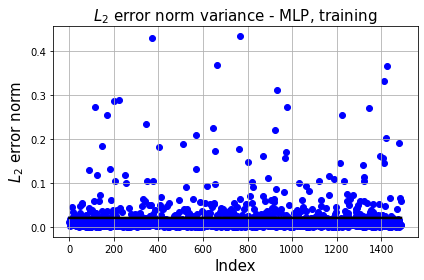

In [119]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - MLP, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

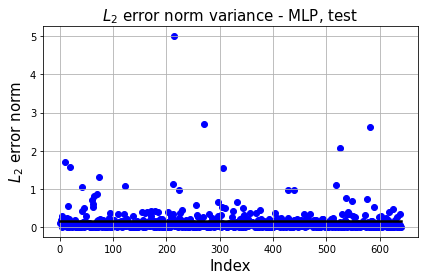

In [120]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - MLP, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

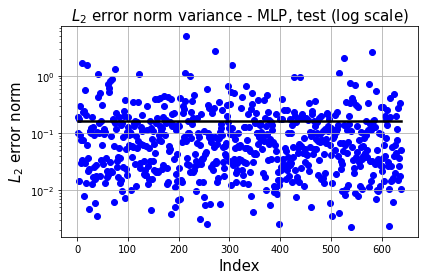

In [122]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variance - MLP, test (log scale)', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

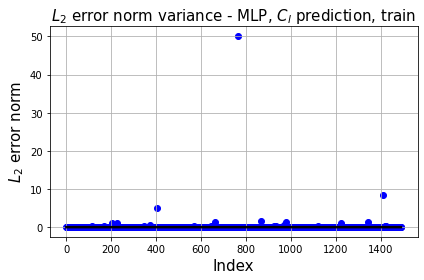

In [144]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_Cl_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_Cl_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - MLP, $C_l$ prediction, train', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

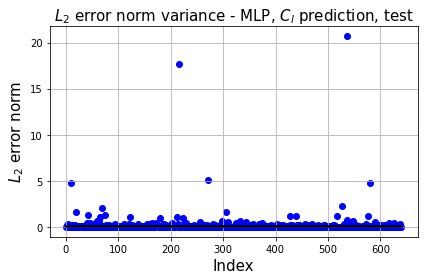

In [145]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_Cl_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_Cl_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - MLP, $C_l$ prediction, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

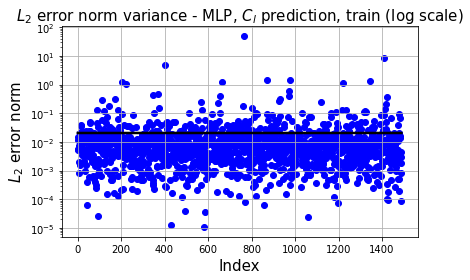

In [148]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_Cl_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_Cl_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variance - MLP, $C_l$ prediction, train (log scale)', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

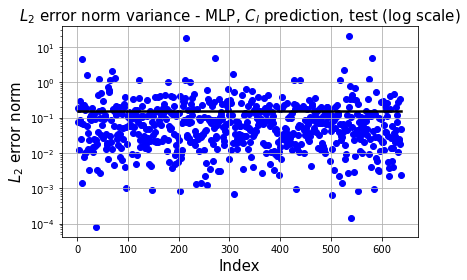

In [147]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_Cl_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_Cl_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variance - MLP, $C_l$ prediction, test (log scale)', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

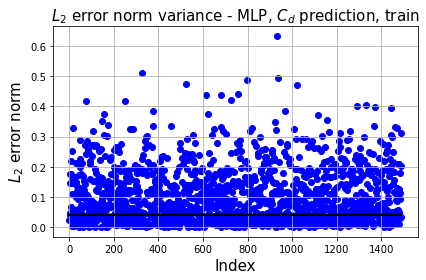

In [143]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_Cd_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_Cd_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - MLP, $C_d$ prediction, train', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

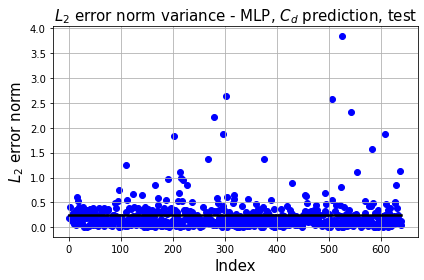

In [141]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_Cd_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_Cd_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - MLP, $C_d$ prediction, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

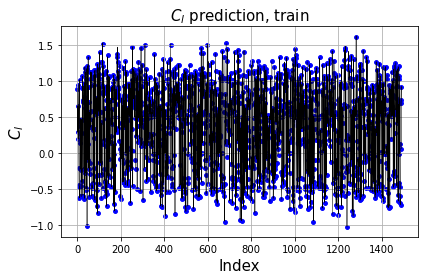

In [155]:
plt.plot(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), y_train[:,0,:], 'k',lw=0.5)
plt.scatter(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), decoded_train[:,0,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.title(r'$C_l$ prediction, train', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

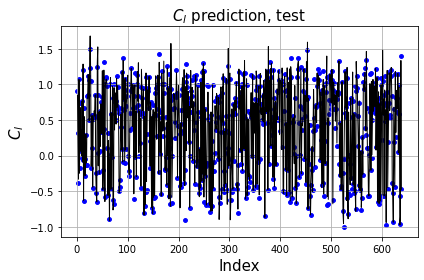

In [156]:
plt.plot(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), y_test[:,0,:], 'k',lw=1)
plt.scatter(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), decoded_test[:,0,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.title(r'$C_l$ prediction, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

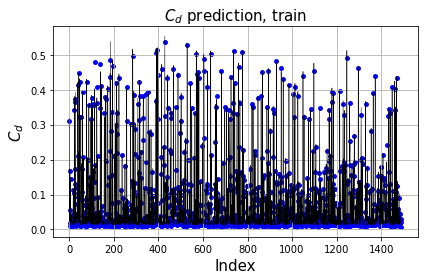

In [154]:
plt.plot(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), y_train[:,1,:], 'k',lw=0.5)
plt.scatter(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), decoded_train[:,1,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.title(r'$C_d$ prediction, train', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

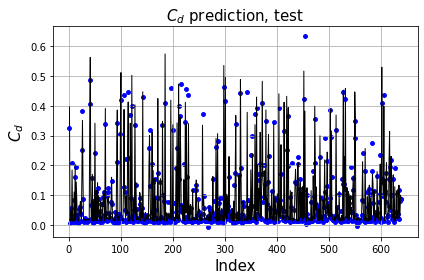

In [149]:
plt.plot(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), y_test[:,1,:], 'k',lw=1)
plt.scatter(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), decoded_test[:,1,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.title(r'$C_d$ prediction, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 15ms/step


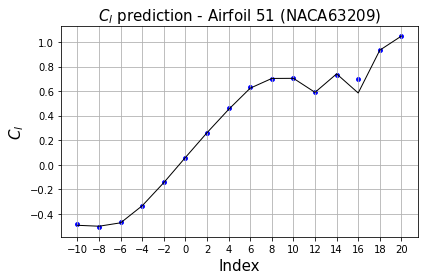

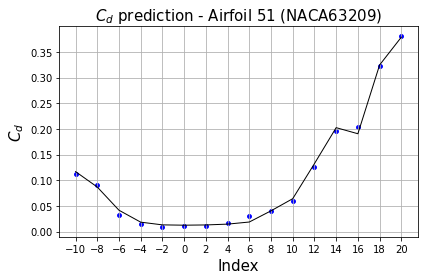

In [202]:
airfoil51_coord = coord[16*50:16*51]
airfoil51_aa = aa[16*50:16*51]
airfoil51_predict = model.predict([airfoil51_coord, airfoil51_aa])

airfoil51_cl=y[16*50:16*51,0,:]
airfoil51_cd=y[16*50:16*51,1,:]

plt.plot(alpha, airfoil51_cl.reshape(16,), 'k', lw=1)
plt.scatter(alpha, airfoil51_predict[:,0,:].reshape(16,), c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title('$C_l$ prediction - Airfoil 51 (%s)' % (str(geometry[16*50])[3:-2]), fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoil51_cd.reshape(16,), 'k', lw=1)
plt.scatter(alpha, airfoil51_predict[:,1,:].reshape(16,), c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title('$C_d$ prediction - Airfoil 51 (%s)' % (str(geometry[16*50])[3:-2]), fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 16ms/step


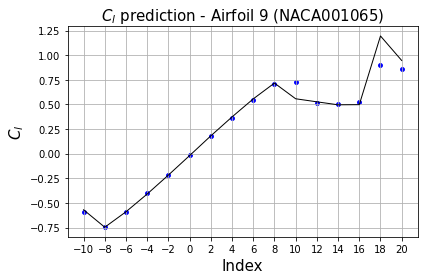

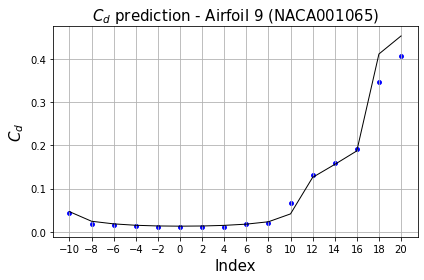

In [201]:
airfoil8_coord = coord[16*7:16*8]
airfoil8_aa = aa[16*7:16*8]
airfoil8_predict = model.predict([airfoil8_coord, airfoil8_aa])

airfoil8_cl=y[16*7:16*8,0,:]
airfoil8_cd=y[16*7:16*8,1,:]

plt.plot(alpha, airfoil8_cl.reshape(16,), 'k', lw=1)
plt.scatter(alpha, airfoil8_predict[:,0,:].reshape(16,), c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title('$C_l$ prediction - Airfoil 9 (%s)' % (str(geometry[16*8])[3:-2]), fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoil8_cd.reshape(16,), 'k', lw=1)
plt.scatter(alpha, airfoil8_predict[:,1,:].reshape(16,), c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title('$C_d$ prediction - Airfoil 9 (%s)' % (str(geometry[16*8])[3:-2]), fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

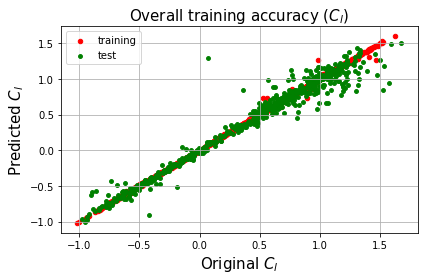

In [217]:
plt.scatter(y_train[:,0,:], decoded_train[:,0,:], c='r', s=20)
plt.scatter(y_test[:,0,:], decoded_test[:,0,:], c='g', s=15)
plt.xlabel('Original $C_l$', fontsize=15)
plt.ylabel('Predicted $C_l$', fontsize=15)
plt.title('Overall training accuracy ($C_l$)', fontsize=15)

plt.grid()
plt.legend(['training', 'test'])
plt.tight_layout()
plt.show()

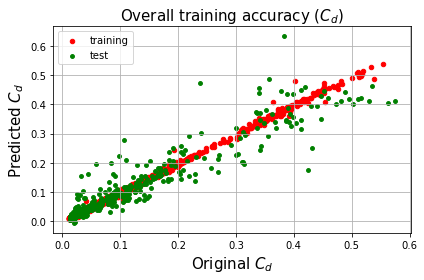

In [212]:
plt.scatter(y_train[:,1,:], decoded_train[:,1,:], c='r', s=20)
plt.scatter(y_test[:,1,:], decoded_test[:,1,:], c='g', s=15)
plt.xlabel('Original $C_d$', fontsize=15)
plt.ylabel('Predicted $C_d$', fontsize=15)
plt.title('Overall training accuracy ($C_d$)', fontsize=15)
plt.grid()
plt.legend(['training', 'test'])
plt.tight_layout()
plt.show()